# Math  1376: Programming for Data Science
---

## External activities for 04-Computational-Applications-prologue
---

**Expected time to completion: 60 minutes**

---

## <mark>Activity 1: A Fourier Approximation Class</mark>

*Note: This activity was originally drafted by PhD student Taylor Roper under the supervision of Troy Butler. All credit for that which is glorious about this activity should be heaped upon Taylor. All faults for deficiencies in this activity lay at the feet of Troy.*

Given a real-valued function $f(x)$ that is defined on the interval $[-1,1]$, it is possible to approximate $f(x)$ as a sum of sine and cosine functions (i.e., as a sum of waves): 

$$
    f(x)\approx \dfrac{a_0}{2} + \sum_{k=1}^{n}\left( a_k\cos \left( \frac{k\pi x}{2}\right)+b_k\sin \left( \frac{k\pi x}{2}\right)\right)
$$ 

where the $\{a_k\}_{i=0}^n$ and $\{b_k\}_{k=1}^n$ are the real-valued coefficients of the cosine and sine functions, respectively.

<mark>***Some key notes:***</mark>

- This type of approximation of a function is referred to as a Fourier approximation. See https://en.wikipedia.org/wiki/Fourier_analysis for some history of this idea. 

- The $\{a_k\}_{k=0}^n$ set is indexed from $0$ to $n$.

  - The term $\dfrac{a_0}{2}$ is the "average value" of $f(x)$ over $[-1,1]$, but for coding purposes, it is perhaps better thought of as the coefficient of $\cos(0\pi x)=\cos(0)=1$.

- Technically, the $\{b_k\}_{k=1}^n$ set is indexed from $1$ to $n$ and there is no $b_0$ because $\sin(0)=0$. 

  - In code we find it convenient to define $b_0:=0$ and consider the set as $\{b_k\}_{k=0}^n$ so that both sets of coefficients are of the same shape.

- $n$ is generally a positive integer and larger $n$ values are generally associated with better approximations of $f(x)$. 

  - We can also let $n=0$ in which case we have no summation and are approximating $f(x)$ by its average value $\frac{a_0}{2}$ over the domain $[-1,1]$. 



<mark>***How are the coefficients computed?***</mark>

With integrals! Don't worry though. We use Python to perform the integration. We also return to the topic of numerical integration in the next module.

Specifically, for each $k$, 

$$
    a_k := \int_{-1}^1 f(x)\cos(k\pi x)\, dx \qquad \text{ and } \qquad b_k := \int_{-1}^1 f(x)\sin(k\pi x)\, dx.
$$

**An example.** 

Consider the function $f(x)=x$. 

Using $n=3$, we have that the $a_i$'s are all 0 whereas $b_1\approx 0.40528473$, $b_2\approx 0.31830989$, and $b_3\approx-0.04503164$ so that 

$$
    f(x)\approx 0.40528473\sin \left( \dfrac{\pi x}{2}\right)+0.31830989\sin \left( \dfrac{2\pi x}{2}\right)-0.04503164\sin \left( \dfrac{3\pi x}{2}\right).
$$ 

We construct and plot $f(x)$ and this approximation in the code cells below..

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):  # defining f(x)
    return x

def f_approx(x):  # defining the approximation of f(x) using cosine's and sine's
    return 0.40528473*np.sin(np.pi*x/2)+0.31830989*np.sin(2*np.pi*x/2)-0.04503164*np.sin(3*np.pi*x/2)

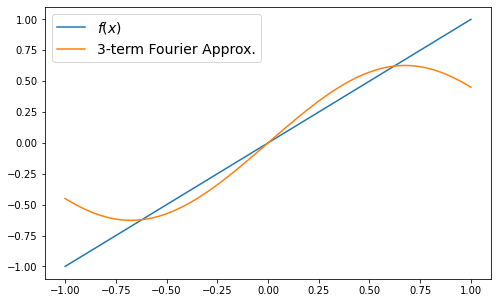

In [8]:
x = np.linspace(-1,1,100) # 100 values between -1 and 1 to use for plotting

plt.figure(figsize=(8,5))
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, f_approx(x), label='3-term Fourier Approx.')
plt.legend(fontsize=14);

**Goal for this activity.**

<mark>Complete the missing `plot` method for the class called `FourierApprox`. </mark>

It is useful to first understand the various attributes of this class.

- Data attributes of this class:

    - A function `func` that we wish to approximate. 

    - An integer `n`.

    - The sets of coefficients in the Fourier approximation given by `a` and `b` as arrays of shape `n+1` (where `b[0]=0`).

- Method attributes of this class (besides the `__init__` method):

    - `fourier_approx_eval` to evaluate the Fourier approximation

    - `plot` to plot both the original function and the Fourier approximation. 

The below code cell contains the incomplete class.

<mark>***Student To-Do's:***</mark>

- Finish coding the `plot` method in the `FourierApprox` class so that the `plot` method will plot both the original function `func` and the Fourier approximation by using `fourier_approx_eval` on the same plot from -1.0 to 1.0. 

- Edit the `__init__` class so that `n` has a default value of 10.

- Run the `# Instructor created code cell` marked code cells that follow to test what you have done.

- Complete the other code cells that follow where prompted to create your own function called `my_func`, construct a Fourier approximation of it using an instantiation of the `FourierApprox` class, and use the `plot` method to graph your function along with its Fourier approximation with `n=20` terms.

In [ ]:
import scipy.integrate as integrate

class FourierApprox(object):
    '''
    This class creates a Fourier approximation of a given function and provides methods to evaluate 
    and plot the Fourier approximation. 
    
    Variables 
    ---------
    func: function to be approximation. Function needs to be defined on the interval [-1,1].
    n: number of terms to be kept from the Fourier series. 
    
    Attributes
    ----------
    a: array with shape n+1 that contains the coefficients a_k from k=0 to k=n. 
    b: array with shape n+1 that contains the coefficients b_k from k=0 to k=n. 
    
    Methods
    -------
    fourier_approx_eval(x): evaluates the Fourier approximation of func at x.
    plot(): plots the Fourier approximation along with func.
    '''
    
    def __init__(self, func, n):
        self.func = func
        self.n = n
        
        def integrand_a_k(x,k):
            return(self.func(x)*np.cos(k*np.pi*x/2)/2)
        def integrand_b_k(x,k):
            return(self.func(x)*np.sin(k*np.pi*x/2)/2)
        
        # creating coefficients of Fourier approximation as a attributes as and bs
        coefficients = np.zeros(shape=(2,self.n+1))
        coefficients[0,0] = integrate.quad(func, -1, 1)[0]/2
        
        for i in range(self.n):
            coefficients[0,i+1] = integrate.quad(integrand_a_k, -1, 1, args=i+1)[0]
            coefficients[1,i+1] = integrate.quad(integrand_b_k, -1, 1, args=i+1)[0]
            
        self.a = coefficients[0,:]
        self.b = coefficients[1,:]
            
    def fourier_approx_eval(self, x):
        '''
        Method for evaluating the Fourier approximation at x. 
        '''
        
        fourier_approx_value = self.a[0]/2
        for i in range(self.n):
            fourier_approx_value += self.a[i+1]*np.cos((i+1)*np.pi*x/2) + self.b[i+1]*np.sin((i+1)*np.pi*x/2)
        return(fourier_approx_value)
    
    def plot(self):
        '''
        Method for plotting the Fourier approximation and the original function.
        '''
        

In [ ]:
# Instructor created code cell

f_approx_1 = FourierApprox(lambda x: x, n = 3)

In [ ]:
# Instructor created code cell

print(f_approx_1.a)  # These are zeros
print(f_approx_1.b) 

In [ ]:
# Instructor created code cell

f_approx_1.plot()  # This will not produce a plot until students complete the plot method in FourierApprox

In [ ]:
# Instructor created code cell

f_approx_1 = FourierApprox(lambda x: x)  # This will produce a TypeError if students have not defaulted n=10 as instructed

In [ ]:
# Instructor created code cell

f_approx_1.plot()  # This will not produce a plot until students complete the plot method in FourierApprox

In [ ]:
def func(x):
    # Students should define their own real-valued function here
    # Make sure your function can take both `float` and `ndarray` types as inputs
    # Make sure your function is defined on [-1,1]
    return()

In [ ]:
# Students should create f_approx_2 as an instantiation of the FourierApprox using func defined above
# as well as n=20 and use the plot method to plot this func along with its 20-term Fourier approximation.



<hr style="border:5px solid cyan"> </hr>